## EDA Smart City

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# Set agg.path.chunksize to a higher value
mpl.rcParams['agg.path.chunksize'] = 10000

sns.set()

## Traffic information

- Run File Traffic Processing to aggregate and generate csv file

In [88]:
numeric_cols = ['vehicle_count', 'avg_speed',  'avg_measured_time', 'median_measured_time']

traffic_df = pd.read_csv("../data/aarhus_traffic_data_aug_nov_2014.csv")
traffic_df['timestamp'] = pd.to_datetime(traffic_df['timestamp'])
traffic_df.set_index('timestamp', inplace=True)
traffic_df.head()

,Unnamed: 0,status,avg_measured_time,avg_speed,ext_id,median_measured_time,vehicle_count,_id,report_id
timestamp,,,,,,,,,
2014-08-01 07:50:00,0,OK,74,50,668,74,5,20746220,158324
2014-08-01 07:55:00,1,OK,73,50,668,73,6,20746392,158324
2014-08-01 08:00:00,2,OK,61,60,668,61,4,20746723,158324
2014-08-01 08:05:00,3,OK,61,60,668,61,1,20747172,158324
2014-08-01 08:10:00,4,OK,63,58,668,63,3,20747545,158324


In [89]:

traffic_df.describe()

,Unnamed: 0,avg_measured_time,avg_speed,ext_id,median_measured_time,vehicle_count,_id,report_id
count,1.152041e+07,1.152041e+07,1.152041e+07,1.152041e+07,1.152041e+07,1.152041e+07,1.152041e+07,1.152041e+07
mean,6.792128e+03,1.084685e+02,4.364266e+01,8.307501e+02,1.084685e+02,3.120078e+00,2.665867e+07,1.904506e+05
std,4.299058e+03,1.790712e+02,2.167510e+01,1.293762e+02,1.790712e+02,5.755237e+00,3.386352e+06,1.170804e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+02,0.000000e+00,0.000000e+00,2.074616e+07,1.583240e+05
25%,3.207000e+03,5.400000e+01,2.900000e+01,7.180000e+02,5.400000e+01,0.000000e+00,2.373267e+07,1.846210e+05
50%,6.414000e+03,8.100000e+01,4.200000e+01,8.300000e+02,8.100000e+01,1.000000e+00,2.667744e+07,1.907700e+05
75%,9.648000e+03,1.160000e+02,5.700000e+01,9.420000e+02,1.160000e+02,4.000000e+00,2.959456e+07,1.979770e+05
max,1.698600e+04,3.585000e+03,1.500000e+02,1.058000e+03,3.585000e+03,1.090000e+02,3.250969e+07,2.101990e+05


In [84]:
# Sampling
# Aggregate numeric columns by mean for hourly intervals
#hourly_data = traffic_df[numeric_cols].resample('H').mean().reset_index()
sampled_data = traffic_df.sample(frac=0.1, random_state=42).sort_index()
sampled_data.describe()

,Unnamed: 0,avg_measured_time,avg_speed,ext_id,median_measured_time,vehicle_count,_id,report_id
count,1.152041e+06,1.152041e+06,1.152041e+06,1.152041e+06,1.152041e+06,1.152041e+06,1.152041e+06,1.152041e+06
mean,6.788427e+03,1.085409e+02,4.366623e+01,8.305570e+02,1.085409e+02,3.113215e+00,2.666235e+07,1.904418e+05
std,4.299832e+03,1.791163e+02,2.170690e+01,1.293869e+02,1.791163e+02,5.751191e+00,3.388105e+06,1.171799e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+02,0.000000e+00,0.000000e+00,2.074617e+07,1.583240e+05
25%,3.201000e+03,5.400000e+01,2.900000e+01,7.180000e+02,5.400000e+01,0.000000e+00,2.373328e+07,1.846210e+05
50%,6.408000e+03,8.100000e+01,4.200000e+01,8.290000e+02,8.100000e+01,1.000000e+00,2.668752e+07,1.907700e+05
75%,9.640000e+03,1.170000e+02,5.700000e+01,9.420000e+02,1.170000e+02,4.000000e+00,2.960097e+07,1.979770e+05
max,1.698000e+04,3.585000e+03,1.490000e+02,1.058000e+03,3.585000e+03,1.040000e+02,3.250968e+07,2.101990e+05


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

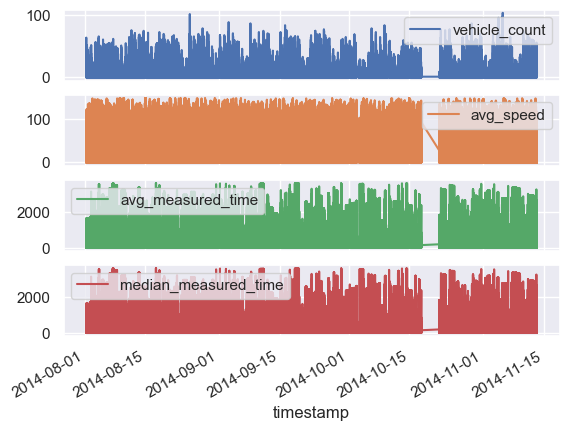

In [90]:
# General Data Visualization
sampled_data[numeric_cols].plot(subplots=True)

In [92]:
# Compute weekly rolling average instead of 5 minute-level
window_size = 7 * 24  # 7 days * 24 hours (weekly window)
df_rolling = sampled_data[numeric_cols].rolling(window=window_size, min_periods=1).mean()
print(df_rolling.columns)
df_rolling.reset_index(inplace=True)
df_rolling.head()


Index(['vehicle_count', 'avg_speed', 'avg_measured_time',
       'median_measured_time'],
      dtype='object')


,timestamp,vehicle_count,avg_speed,avg_measured_time,median_measured_time
0,2014-08-01 07:50:00,0.000000,40.000000,71.000000,71.000000
1,2014-08-01 07:50:00,2.000000,38.000000,86.500000,86.500000
2,2014-08-01 07:50:00,1.333333,28.666667,143.666667,143.666667
3,2014-08-01 07:50:00,1.000000,30.000000,132.000000,132.000000
4,2014-08-01 07:50:00,1.400000,37.200000,126.000000,126.000000


In [93]:
# Reshape for Seaborn
long_rolling_avg_sampled = df_rolling.melt(id_vars='timestamp', var_name='Variable', value_name='Value')

# Plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=long_rolling_avg_sampled, x='timestamp', y='Value', hue='Variable')
plt.title('Traffic Data Moving Average (Sampled)', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Moving Average', fontsize=14)
plt.legend(title='Variable', loc='upper right')
plt.grid(True)
plt.show()

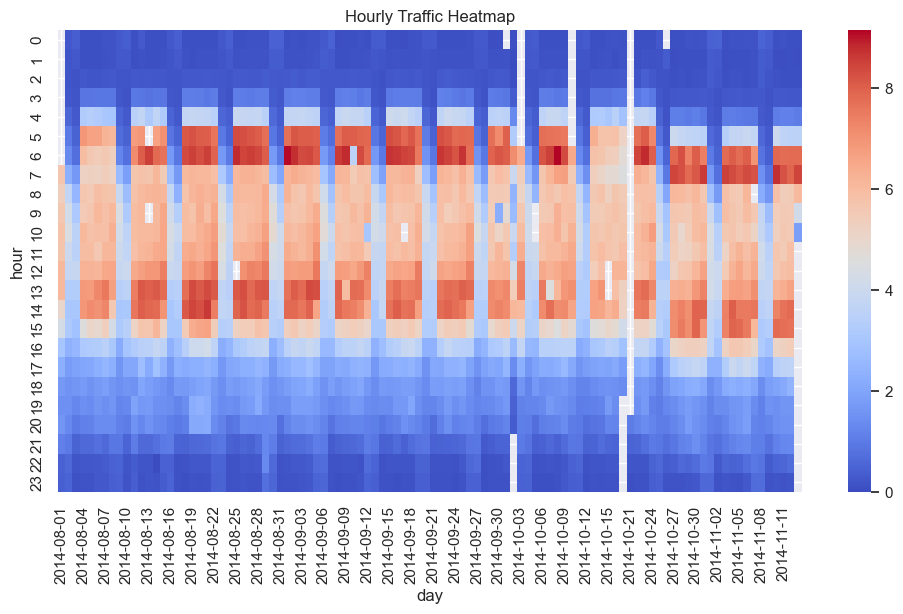

In [ ]:
# Pivot table for heatmap
heatmap_data = traffic_df.pivot_table(values='vehicle_count', index='hour', columns='day', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Hourly Traffic Heatmap - Full timeframe')
plt.show()